In [9]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 


### One Hot Encoding the Target Classes

In [10]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [11]:

# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'../Brain Tumor Detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [12]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"../Brain Tumor Detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [13]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [14]:
result = np.array(result)
result = result.reshape(139,2)

### Splitting the Data into Training & Testing

In [15]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

### Model Building

In [16]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

C:\Users\hakgs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [17]:
y_train.shape

(111, 2)

In [9]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - loss: 21.3351 - val_loss: 48.0015
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 937ms/step - loss: 17.5442 - val_loss: 18.6374
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 831ms/step - loss: 8.9281 - val_loss: 13.8994
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 835ms/step - loss: 3.6571 - val_loss: 10.1689
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 859ms/step - loss: 5.8405 - val_loss: 7.1886
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 1.7661 - val_loss: 10.4465
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 2.6969 - val_loss: 8.2899
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.5066 - val_loss: 6.4481
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.1279 - val_loss: 5.9964
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.5769 - val_loss: 5.9008
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.1904 - val_loss: 5.9129
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.2084 - val_loss: 5.8760
Epoch

In [13]:
model.save("BrainTumorDectection.keras")

In [19]:
model.save("BrainTumorDectection.h5")

### Plotting Losses

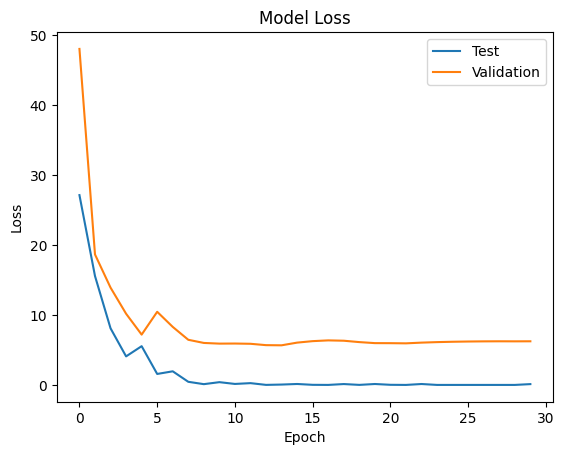

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [19]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("BrainTumorDectection.h5")

# Evaluate the model
loss = model.evaluate(x_train, y_train)
print(f"Loss: {loss}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - loss: 0.0474 
Loss: 0.07473526149988174


In [21]:
# Load the model
model = load_model("BrainTumorDectection.h5")

# Compile the model with the desired metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model
loss, accuracy = model.evaluate(x_train, y_train)
print(f"Loss: {loss}, Accuracy: {accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.9943 - loss: 0.4935
Loss: 0.5443459153175354, Accuracy: 0.9909909963607788
